### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


### Loading the Datasets

In [2]:
df1=pd.read_csv('ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2=pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3=pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

### Creating a function to remove duplicates

In [3]:
def remove_duplicates(dataframe,df_variable):
    a=len(dataframe)
    print(f'Original length of dataframe {df_variable}',a)
    dataframe.drop_duplicates(inplace=True)
    b=len(dataframe)
    print(f'Dataframe {df_variable} length after dropping duplicate rows',b)
    print('No of duplicate rows removed',a-b)

In [4]:
remove_duplicates(df1,'df1')

Original length of dataframe df1 287196
Dataframe df1 length after dropping duplicate rows 286370
No of duplicate rows removed 826


In [5]:
remove_duplicates(df2,'df2')

Original length of dataframe df2 369651
Dataframe df2 length after dropping duplicate rows 369138
No of duplicate rows removed 513


In [6]:
remove_duplicates(df3,'df3')

Original length of dataframe df3 164824
Dataframe df3 length after dropping duplicate rows 164547
No of duplicate rows removed 277


### Concatenating all three datasets to a single dataset

In [7]:
df=pd.concat([df1,df2,df3])

In [8]:
df.shape

(820055, 11)

In [9]:
((df1.shape),(df2.shape),(df3.shape))

((286370, 10), (369138, 10), (164547, 11))

In [10]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [11]:
df['month']=df['month'].astype('datetime64[ns]')

df['year'] = pd.DatetimeIndex(df['month']).year
df['month_'] = pd.DatetimeIndex(df['month']).month

df[['month_','year']].head()

,month_,year
0,1,1990
1,1,1990
2,1,1990
3,1,1990
4,1,1990


### Choosing only the selected features along with the target variable

In [12]:
df=df[[ 'street_name', 'year','floor_area_sqm','resale_price']]

In [13]:
df.to_csv('singapore_features.csv',encoding='utf-8')
#to use in the user-friendly application

### Plotting the target variable to get insights

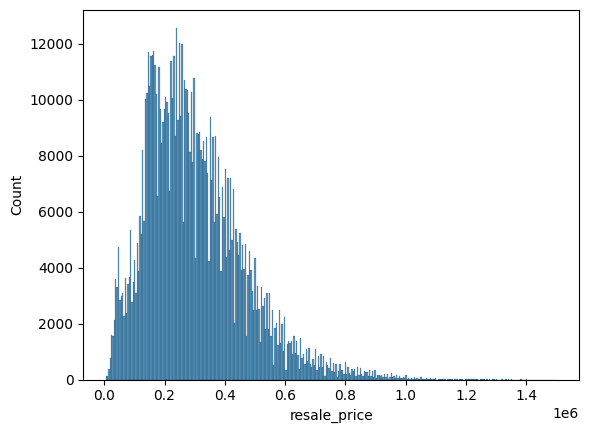

In [14]:
sns.histplot(df['resale_price'])
plt.show()

In [15]:
df['resale_price'].describe()

count    8.200550e+05
mean     3.014311e+05
std      1.633484e+05
min      5.000000e+03
25%      1.800000e+05
50%      2.750000e+05
75%      3.900000e+05
max      1.500000e+06
Name: resale_price, dtype: float64

### Finding null values in the dataset

In [16]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
street_name,object,0,582,0.0
year,int32,0,30,0.0
floor_area_sqm,float64,0,209,0.0
resale_price,float64,0,8799,0.0


In [17]:
df.columns

Index(['street_name', 'year', 'floor_area_sqm', 'resale_price'], dtype='object')

### Segragating categorical and numerical columns

In [18]:
#categorical columns list
cc=[]
#numerical columns list
nc=[]
for i in df.columns:
    if df[i].dtype=='O':
        cc.append(i)
    else:
        nc.append(i)
print('categorical_columns:',cc)
print()
print('numerical_columns:',nc)

categorical_columns: ['street_name']

numerical_columns: ['year', 'floor_area_sqm', 'resale_price']


### Finding outliers in categorical columns and replacing it with upper and lower limit values respectively

In [19]:
def plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

   # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

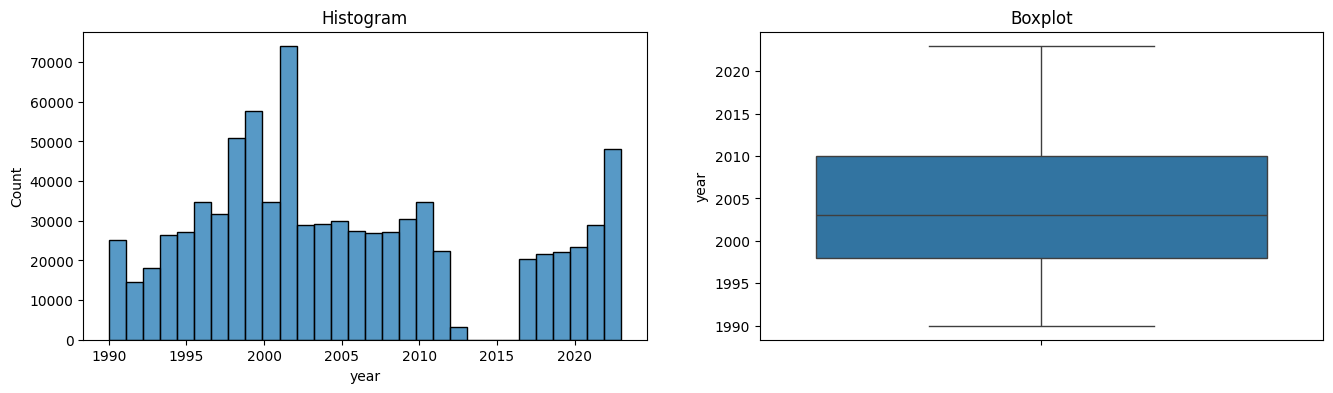

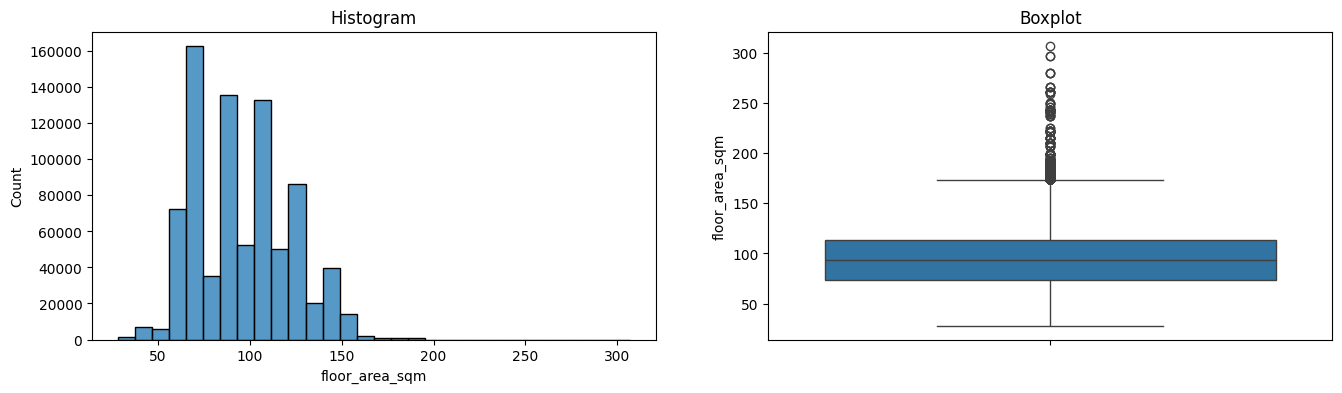

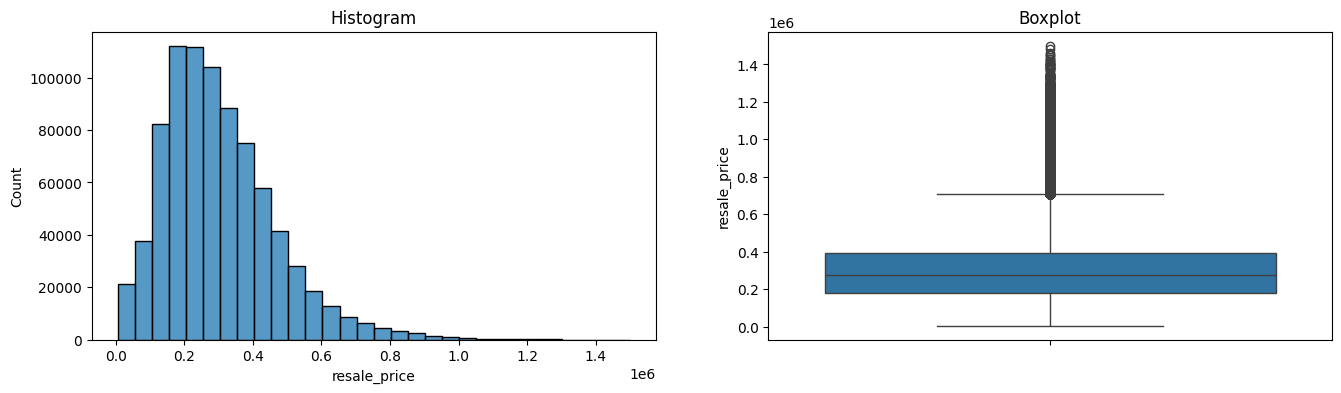

In [20]:
for col in nc:
    plots(df, col)

In [21]:
def find_skewed_boundaries(df, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions


    IQR = round(df[variable].quantile(0.75) - df[variable].quantile(0.25))

    lower_boundary = abs(round(df[variable].quantile(0.25) - (IQR * distance)))
    upper_boundary = abs(round(df[variable].quantile(0.75) + (IQR * distance)))

    return upper_boundary, lower_boundary

In [22]:
ul=[]
for v in nc:
    upper_limit, lower_limit = find_skewed_boundaries(df, v, 1.5)
    ul.append((v,upper_limit, lower_limit))

In [23]:
def replace_outlier(dataset,variable,upper_limit,lower_limit):
    dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,
                       np.where(dataset[variable] < lower_limit, lower_limit, dataset[variable]))

In [24]:
for v1 in range(len(ul)):
    replace_outlier(df,ul[v1][0],ul[v1][1],ul[v1][2])

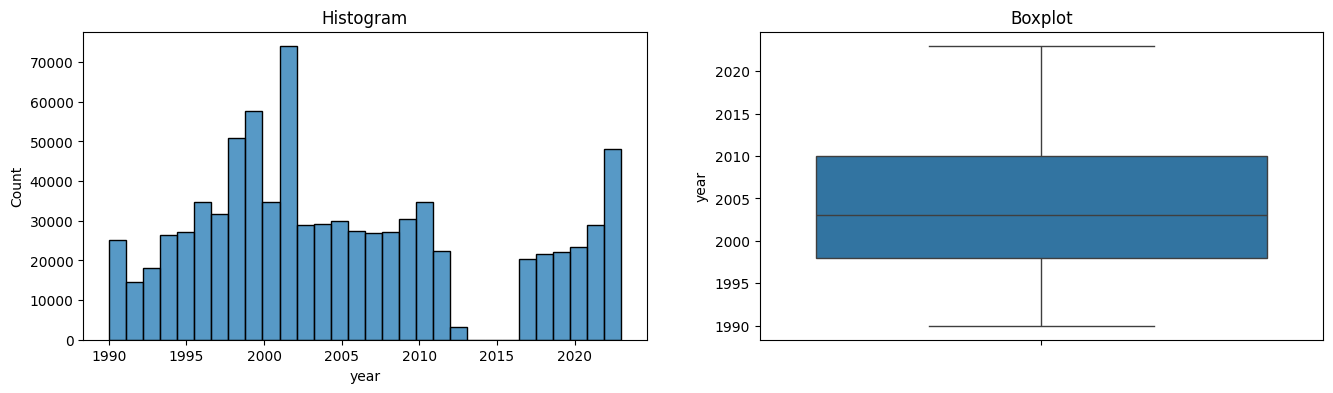

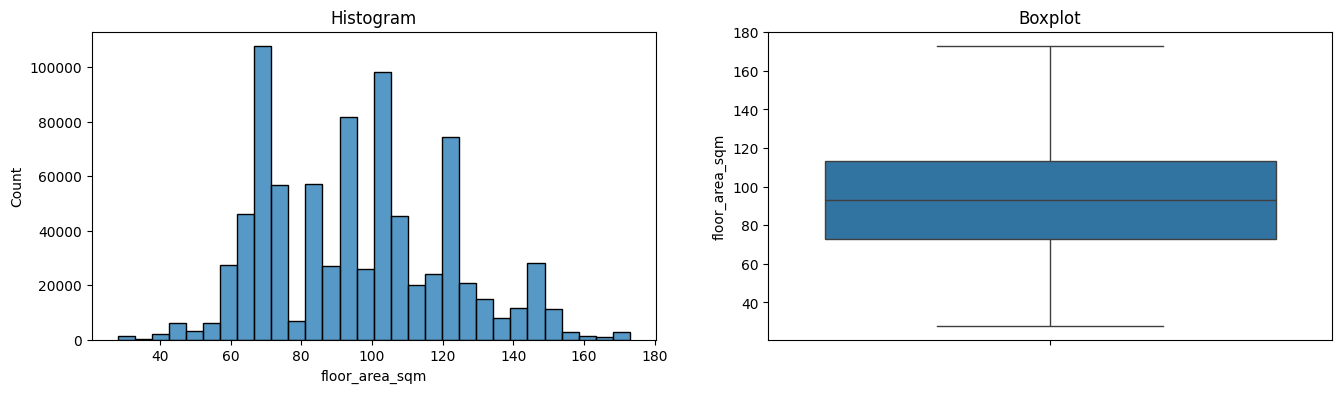

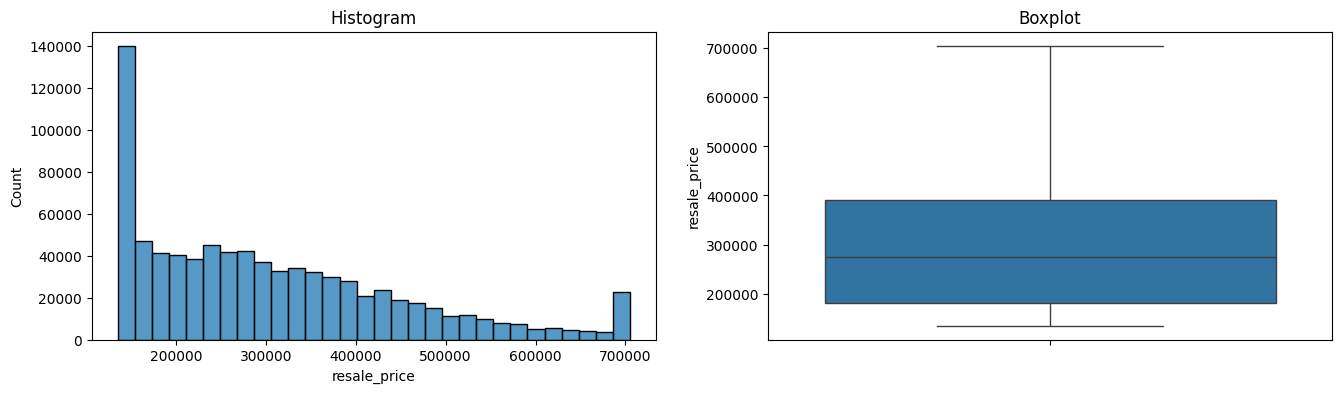

In [25]:
for col in nc:
    plots(df, col)

### Changing the distribution of the 'resale_price'

In [26]:
# for Q-Q plots
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

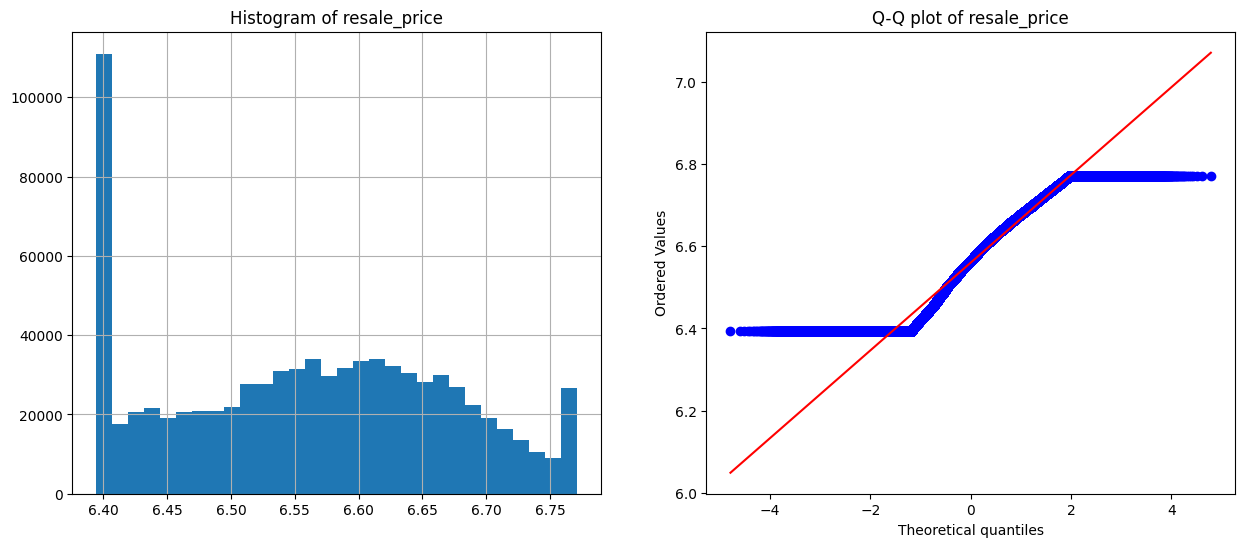

In [27]:
# with open-source packages
from sklearn.preprocessing import PowerTransformer

#transforming the 'resale_price' column using "box-cox"
transformer1 = PowerTransformer(method="box-cox", standardize=False)
transformer1.fit(df[['resale_price']])
# transformer1.set_output(transform="pandas")
df['resale_price']= transformer1.transform(df[['resale_price']])

diagnostic_plots(df, 'resale_price')


In [28]:
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

In [29]:
y=df['resale_price']
X=df[['street_name', 'year','floor_area_sqm']]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # predictors
    y,  # target
    test_size=0.25,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((615041, 3), (205014, 3))

In [30]:
mean_enc = MeanEncoder(variables=cc) #cc- categorical columns
mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['street_name'])

In [31]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()


,street_name,year,floor_area_sqm
12964,6.530488,2017,70.0
346306,6.498395,2011,142.0
81329,6.434604,2020,74.0
144166,6.473712,2004,67.0
171346,6.483933,1997,121.0


In [32]:
X_test.isnull().sum()

street_name       0
year              0
floor_area_sqm    0
dtype: int64

In [33]:
df3=pd.concat([X_train, X_test])
df4=list(pd.concat([y_train, y_test]))
df3['resale_price']=df4

In [34]:
X=df3.iloc[:,:-1].values
y=df3.iloc[:,-1].values

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
hr=HistGradientBoostingRegressor(learning_rate=0.05,max_leaf_nodes=300,max_depth=200,
                                               max_iter=1000,
                                               random_state=2023)
# Train the model.
scaler = StandardScaler()
X=scaler.fit_transform(X)
hr.fit(X, y)

# Make predictions on the train set and calculate
# the mean squared error.

pred = hr.predict(X)
print('HistGradientBoostingRegressor rmse: {}'.format(np.sqrt(mean_squared_error(y, pred))))
print('HistGradientBoostingRegressor r2-score: {}'.format(r2_score(y, pred)))

HistGradientBoostingRegressor rmse: 0.018636035223179793
HistGradientBoostingRegressor r2-score: 0.970812858417485


### Inverse transforming the target column and comparing the 'actual' and 'predicted' values

In [37]:
pred_o=transformer1.inverse_transform(pred.reshape(-1, 1))
y_o= transformer1.inverse_transform(y.reshape(-1, 1))

x=pd.DataFrame({'rv':list(y_o),'pv':list(pred_o)})


C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [38]:
x['residual']=((x['rv']-x['pv']))
x['error']=((x['rv']-x['pv'])/(x['rv']))
x.head()

,rv,pv,residual,error
0,[270000.0000000002],[307269.6277479001],[-37269.62774789991],[-0.13803565832555514]
1,[503000.00000000064],[528277.3719255524],[-25277.371925551735],[-0.05025322450407893]
2,[244999.99999999985],[235989.29928160345],[9010.700718396401],[0.036778370279169005]
3,[135000.0000000002],[149745.97490681324],[-14745.974906813033],[-0.10922944375417046]
4,[357000.00000000035],[385865.81603137334],[-28865.81603137299],[-0.08085662753885983]


In [39]:
round(list(x['error'].max())[0],2),round(list(x['error'].min())[0],2)

(0.56, -2.11)

In [40]:
x['residual_cor']=[i[0] for i in list(x['residual'])]

In [41]:
x['residual_cor'].describe()

count    820055.000000
mean       1442.752232
std       27222.358062
min     -361876.859146
25%      -11018.972073
50%        -116.068733
75%       12806.132608
max      367450.680758
Name: residual_cor, dtype: float64

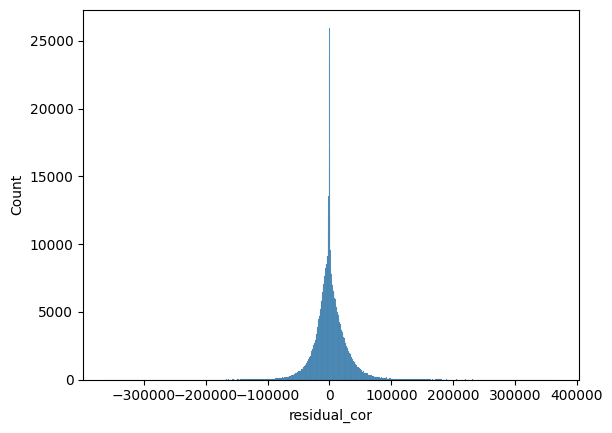

In [42]:
sns.histplot(x['residual_cor'])
plt.show()

### Saving the model

In [43]:
import pickle

In [44]:
data={'transformer1_resale_price':transformer1,
      'mean_enc':mean_enc,'scaler':scaler,'model':hr}

In [45]:
with open('singapore_resale_price_saved_steps_regressor.pkl','wb') as file:
    pickle.dump(data,file)

### Reloading the model from the pickle file and making predictions

In [46]:
with open('singapore_resale_price_saved_steps_regressor.pkl','rb') as file:
    data=pickle.load(file)

In [47]:
resale_box_cox_transform=data['transformer1_resale_price']
mean_enc=data['mean_enc']
scaler=data['scaler']
regressor_loaded=data['model']

In [48]:
X=scaler.fit_transform(X)
regressor_loaded.fit(X,y)
y_pred=regressor_loaded.predict(X)


In [49]:
t=resale_box_cox_transform.inverse_transform(y_pred.reshape(-1,1))
t1=resale_box_cox_transform.inverse_transform(y.reshape(-1, 1))

C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [50]:
f=pd.DataFrame({'true_rent':list(t1),'pred_rent':list(t)})
f['error']=((f['true_rent']-f['pred_rent'])/(f['true_rent']))

In [51]:
round(list(f['error'].max())[0],2),round(list(f['error'].min())[0],2)

(0.56, -2.11)

In [52]:
f['residual']=((f['true_rent']-f['pred_rent']))
f['residual_cor']=[i[0] for i in list(f['residual'])]
f['residual_cor'].describe()

count    820055.000000
mean       1442.752232
std       27222.358062
min     -361876.859146
25%      -11018.972073
50%        -116.068733
75%       12806.132608
max      367450.680758
Name: residual_cor, dtype: float64

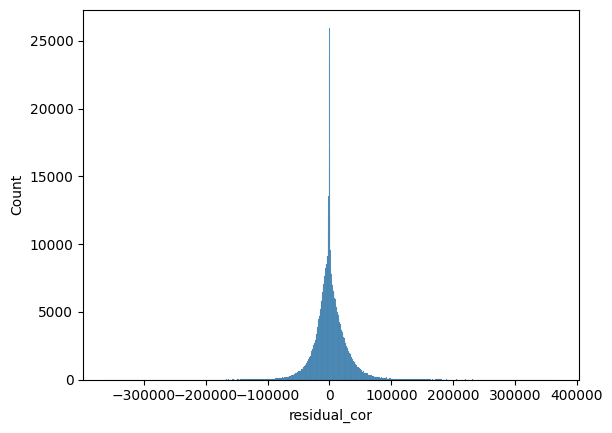

In [53]:
sns.histplot(f['residual_cor'])
plt.show()

- I've saved the model as a pickle file and reloaded it and checked if its working properly. Everything is fine,the residuals/errors before and after pickling the model remains the same
